In [54]:
%pip install sqlalchemy pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
%pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import sys

print(sys.executable)

c:\Users\jarre\AppData\Local\Programs\Python\Python313\python.exe


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# 1. Define your credentials
user = 'postgres'
password = '4141'
host = 'localhost'
port = '5432'
db = 'World'

# 2. Create the engine
# We use the 'psycopg2' driver, which is the standard for Postgres
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{db}')

# 3. Test the connection by pulling the city table
query = "SELECT * FROM city LIMIT 10"
df = pd.read_sql(query, engine)

# View the data
df.head()

,id,name,countrycode,district,population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


In [58]:
query = """
SELECT country.name AS country,
       COUNT(countrylanguage.language) AS number_of_languages
FROM country
JOIN countrylanguage
  ON country.code = countrylanguage.countrycode
WHERE countrylanguage.isofficial = 'T'
GROUP BY country.name
HAVING COUNT(*) > 2
ORDER BY number_of_languages DESC;
"""

df = pd.read_sql(query, engine)
df

,country,number_of_languages
0,Switzerland ...,4
1,South Africa ...,4
2,Vanuatu ...,3
3,Belgium ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Bolivia ...,3
7,Singapore ...,3


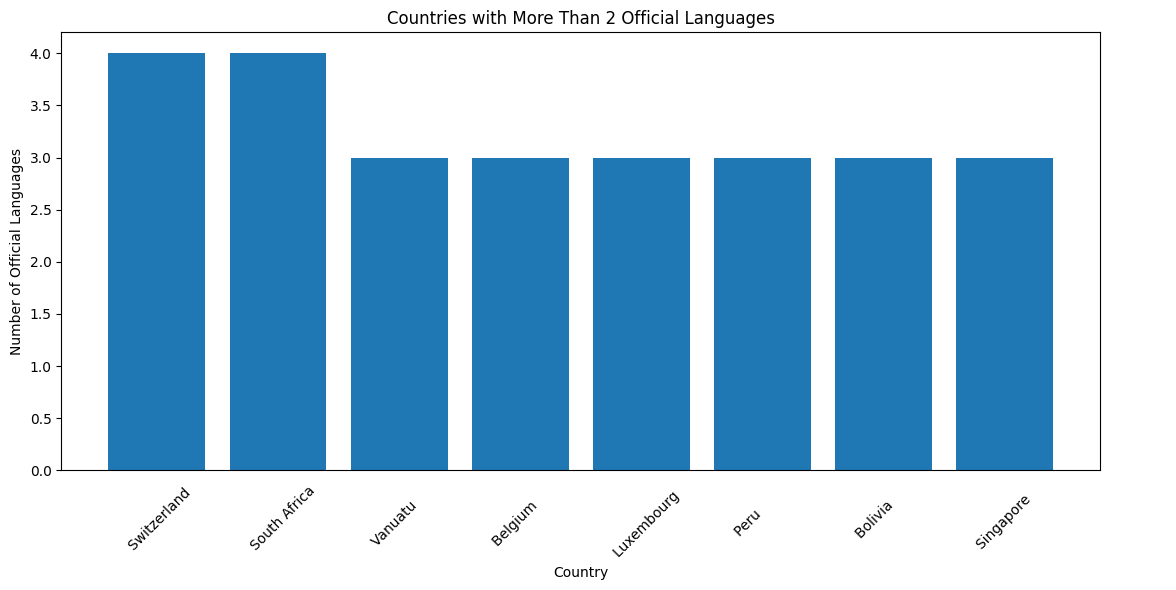

In [59]:
x = np.arange(len(df["country"]))

plt.figure(figsize=(12, 6))
plt.bar(x, df["number_of_languages"])

plt.title("Countries with More Than 2 Official Languages")
plt.xlabel("Country")
plt.ylabel("Number of Official Languages")
plt.xticks(x - 0.25, df["country"], rotation=45, ha="left")
plt.gca().tick_params(axis="x", length=0, pad=-80)
plt.tight_layout()
plt.show()